# Out of Plane Young's Modulus of a Laminate

As seen in figure below, we have a laminate consisting of 2 laminas. Symbols have their usual meaning.

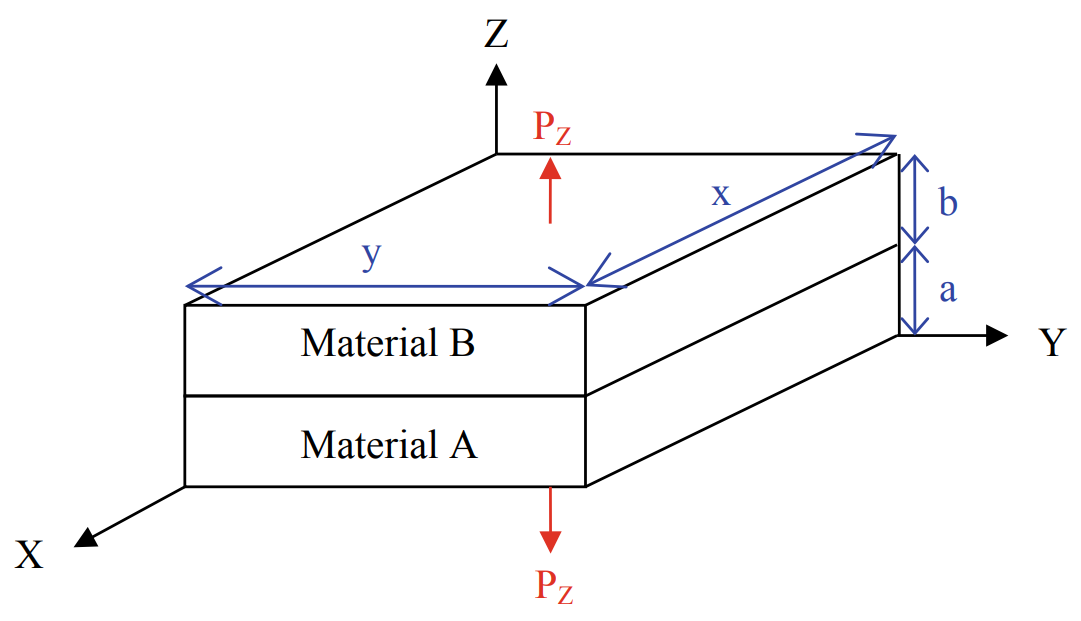

From Hooke's law, we have constituent relations for linear, elastic and isotropic material as follows.

\begin{equation}
\begin{Bmatrix}\epsilon_{AX}\\\epsilon_{AY}\\\epsilon_{AZ}\end{Bmatrix}=\frac{1}{E_A}\begin{bmatrix}1&-\nu_A&-\nu_A\\-\nu_A&1&-\nu_A\\-\nu_A&-\nu_A&1\end{bmatrix}\begin{Bmatrix}\sigma_{AX}\\\sigma_{AY}\\\sigma_{AZ}\end{Bmatrix}
\end{equation}

\begin{equation}
\begin{Bmatrix}\epsilon_{BX}\\\epsilon_{BY}\\\epsilon_{BZ}\end{Bmatrix}=\frac{1}{E_B}\begin{bmatrix}1&-\nu_B&-\nu_B\\-\nu_B&1&-\nu_B\\-\nu_B&-\nu_B&1\end{bmatrix}\begin{Bmatrix}\sigma_{BX}\\\sigma_{BY}\\\sigma_{BZ}\end{Bmatrix}
\end{equation}

Due to equilibrium, we have...

\begin{equation}\sigma_{AZ}=\sigma_{BZ}=\sigma_Z=\frac{P_z}{xy}\end{equation}
\begin{equation}\sigma_{BX}=\frac{-a}{b}\sigma_{AX}\end{equation}
\begin{equation}\sigma_{BY}=\frac{-a}{b}\sigma_{AY}\end{equation}

Also, common strain gives

\begin{equation}\epsilon_{AX}=\epsilon_{BX}\qquad\&\qquad\epsilon_{AY}=\epsilon_{BY}\end{equation}

So we define these relations

In [39]:
import sympy as sym
import numpy as np
nua,nub,Ea,Eb,a,b,x,y,P,Ez = sym.symbols('nu_a,nu_b,E_a,E_b,a,b,x,y,P,E_z')
epax,epay,epaz,epbx,epby,epbz,sigax,sigay,sigaz,sigbx,sigby,sigbz,epz=sym.symbols('\epsilon_{AX},\epsilon_{AY},\epsilon_{AZ},\epsilon_{BX},\epsilon_{BY},\epsilon_{BZ},\sigma_{AX},\sigma_{AY},\sigma_{AZ},\sigma_{BX},\sigma_{BY},\sigma_{BZ},\epsilon_Z')
eq1=sym.Eq(epax,(1/Ea)*(sigax-nua*sigay-nua*sigaz))
eq2=sym.Eq(epay,(1/Ea)*(-nua*sigax+sigay-nua*sigaz))
eq3=sym.Eq(epaz,(1/Ea)*(-nua*sigax-nua*sigay+sigaz))
eq4=sym.Eq(epbx,(1/Eb)*(sigbx-nub*sigby-nub*sigbz))
eq5=sym.Eq(epby,(1/Eb)*(-nub*sigbx+sigby-nub*sigbz))
eq6=sym.Eq(epbz,(1/Eb)*(-nub*sigbx-nub*sigby+sigbz))
eq7=sym.Eq(sigaz,P/(x*y))
eq8=sym.Eq(sigbz,P/(x*y))
eq9=sym.Eq(sigbx,-a*sigax/b)
eq10=sym.Eq(sigby,-a*sigay/b)
eq11=sym.Eq(epax,epbx)
eq12=sym.Eq(epay,epby)
display(eq1,eq2,eq3,eq4,eq5,eq6,eq7,eq8,eq9,eq10,eq11,eq12)

Eq(\epsilon_{AX}, (\sigma_{AX} - \sigma_{AY}*nu_a - \sigma_{AZ}*nu_a)/E_a)

Eq(\epsilon_{AY}, (-\sigma_{AX}*nu_a + \sigma_{AY} - \sigma_{AZ}*nu_a)/E_a)

Eq(\epsilon_{AZ}, (-\sigma_{AX}*nu_a - \sigma_{AY}*nu_a + \sigma_{AZ})/E_a)

Eq(\epsilon_{BX}, (\sigma_{BX} - \sigma_{BY}*nu_b - \sigma_{BZ}*nu_b)/E_b)

Eq(\epsilon_{BY}, (-\sigma_{BX}*nu_b + \sigma_{BY} - \sigma_{BZ}*nu_b)/E_b)

Eq(\epsilon_{BZ}, (-\sigma_{BX}*nu_b - \sigma_{BY}*nu_b + \sigma_{BZ})/E_b)

Eq(\sigma_{AZ}, P/(x*y))

Eq(\sigma_{BZ}, P/(x*y))

Eq(\sigma_{BX}, -\sigma_{AX}*a/b)

Eq(\sigma_{BY}, -\sigma_{AY}*a/b)

Eq(\epsilon_{AX}, \epsilon_{BX})

Eq(\epsilon_{AY}, \epsilon_{BY})

Due to $\epsilon_{AX}=\epsilon_{BX}\;\&\;\epsilon_{AY}=\epsilon_{BY}$, we have...

In [15]:
eq13=sym.Eq((eq1.rhs).subs(sigaz,eq7.rhs),(eq4.rhs).subs(sigbz,eq8.rhs))
eq14=sym.Eq((eq2.rhs).subs(sigaz,eq7.rhs),(eq5.rhs).subs(sigbz,eq8.rhs))
display(eq13,eq14)

Eq((-P*nu_a/(x*y) + \sigma_{AX} - \sigma_{AY}*nu_a)/E_a, (-P*nu_b/(x*y) + \sigma_{BX} - \sigma_{BY}*nu_b)/E_b)

Eq((-P*nu_a/(x*y) - \sigma_{AX}*nu_a + \sigma_{AY})/E_a, (-P*nu_b/(x*y) - \sigma_{BX}*nu_b + \sigma_{BY})/E_b)

Substituting values of $\sigma_{BX}\;\&\;\sigma_{BY}$

In [19]:
eq15=(eq13.subs(sigbx,eq9.rhs)).subs(sigby,eq10.rhs)
eq16=(eq14.subs(sigbx,eq9.rhs)).subs(sigby,eq10.rhs)
display(eq15,eq16)

Eq((-P*nu_a/(x*y) + \sigma_{AX} - \sigma_{AY}*nu_a)/E_a, (-P*nu_b/(x*y) - \sigma_{AX}*a/b + \sigma_{AY}*a*nu_b/b)/E_b)

Eq((-P*nu_a/(x*y) - \sigma_{AX}*nu_a + \sigma_{AY})/E_a, (-P*nu_b/(x*y) + \sigma_{AX}*a*nu_b/b - \sigma_{AY}*a/b)/E_b)

Solving above equations to get $\sigma_{AX}\;\&\;\sigma_{AY}$

In [24]:
soln1=sym.solve([eq15,eq16],[sigax,sigay])
display(soln1)

{\sigma_{AX}: (E_a*P*b*nu_b - E_b*P*b*nu_a)/(E_a*a*nu_b*x*y - E_a*a*x*y + E_b*b*nu_a*x*y - E_b*b*x*y),
 \sigma_{AY}: (E_a*P*b*nu_b - E_b*P*b*nu_a)/(E_a*a*nu_b*x*y - E_a*a*x*y + E_b*b*nu_a*x*y - E_b*b*x*y)}

Now, we substitute these values in $\epsilon_{AZ}\;\&\;\epsilon_{BZ}$

In [31]:
eq17=eq3.subs(eq7.lhs,eq7.rhs).subs(soln1)
eq18=eq6.subs(eq8.lhs,eq8.rhs).subs(eq9.lhs,eq9.rhs).subs(eq10.lhs,eq10.rhs).subs(soln1)
display(eq17,eq18)

Eq(\epsilon_{AZ}, (P/(x*y) - 2*nu_a*(E_a*P*b*nu_b - E_b*P*b*nu_a)/(E_a*a*nu_b*x*y - E_a*a*x*y + E_b*b*nu_a*x*y - E_b*b*x*y))/E_a)

Eq(\epsilon_{BZ}, (P/(x*y) + 2*a*nu_b*(E_a*P*b*nu_b - E_b*P*b*nu_a)/(b*(E_a*a*nu_b*x*y - E_a*a*x*y + E_b*b*nu_a*x*y - E_b*b*x*y)))/E_b)

Now this strains of individual laminas in z-direction gives $\epsilon_Z$ of the laminate as follows

In [66]:
Va,Vb=sym.symbols('V_A,V_B')
eq19=sym.Eq(Va,a/(a+b))
eq20=sym.Eq(Vb,b/(a+b))
display(eq19,eq20)
eq21=sym.Eq(epz,Va*epaz+Vb*epbz)
display(eq21)

Eq(V_A, a/(a + b))

Eq(V_B, b/(a + b))

Eq(\epsilon_Z, V_A*\epsilon_{AZ} + V_B*\epsilon_{BZ})

In [46]:
eq22=eq21.subs(eq17.lhs,eq17.rhs).subs(eq18.lhs,eq18.rhs).simplify()
display(eq22)

Eq(\epsilon_Z, P*(E_a*V_B*(E_a*a*nu_b - E_a*a + E_b*b*nu_a - E_b*b + 2*a*nu_b*(E_a*nu_b - E_b*nu_a)) + E_b*V_A*(E_a*a*nu_b - E_a*a + E_b*b*nu_a - E_b*b - 2*b*nu_a*(E_a*nu_b - E_b*nu_a)))/(E_a*E_b*x*y*(E_a*a*nu_b - E_a*a + E_b*b*nu_a - E_b*b)))

Now, from Hooke's law, we have $\sigma_z=E_z\epsilon_z$...

In [59]:
eq23=sym.Eq(Ez,(P/(x*y))/eq22.rhs)
display(eq23)

Eq(E_z, E_a*E_b*(E_a*a*nu_b - E_a*a + E_b*b*nu_a - E_b*b)/(E_a*V_B*(E_a*a*nu_b - E_a*a + E_b*b*nu_a - E_b*b + 2*a*nu_b*(E_a*nu_b - E_b*nu_a)) + E_b*V_A*(E_a*a*nu_b - E_a*a + E_b*b*nu_a - E_b*b - 2*b*nu_a*(E_a*nu_b - E_b*nu_a))))

Above equation of Out of plane Young's Modulus of the composite have terms 'a' and 'b' which need to be eliminated via volume fraction. Cosider following steps that helps us achieve that by defining a thickness variable 't'

In [69]:
t=sym.symbols('t')
eq24=eq23.subs(a,Va*(a+b)).subs(a+b,t).subs(b,Vb*(a+b)).subs(a+b,t).simplify()
display(eq24)

Eq(E_z, E_a*E_b*(E_a*V_A*nu_b - E_a*V_A + E_b*V_B*nu_a - E_b*V_B)/(E_a*V_B*(E_a*V_A*nu_b - E_a*V_A + E_b*V_B*nu_a - E_b*V_B + 2*V_A*nu_b*(E_a*nu_b - E_b*nu_a)) - E_b*V_A*(-E_a*V_A*nu_b + E_a*V_A - E_b*V_B*nu_a + E_b*V_B + 2*V_B*nu_a*(E_a*nu_b - E_b*nu_a))))

Now our equation of $E_z$ is entirely in terms of Volume fraction, Young's Modulus and Poisson's ratio of individual lamina.

# Case:1: $E_a=E_b=E_0$ and $V_A=V_B=0.5$

In [75]:
E0=sym.symbols('E_0')
eq25=eq24.subs(Ea,E0).subs(Eb,E0).subs(Va,0.5).subs(Vb,0.5).simplify()
display(eq25)

Eq(E_z, 2.0*E_0*(-0.5*nu_a - 0.5*nu_b + 1.0)/(1.0*nu_a*(-nu_a + nu_b) - 1.0*nu_a + 1.0*nu_b*(nu_a - nu_b) - 1.0*nu_b + 2.0))

In [101]:
E1byE0=(eq25.rhs/E0).simplify()
display(E1byE0)

(1.0*nu_a + 1.0*nu_b - 2.0)/(1.0*nu_a*(nu_a - nu_b) + 1.0*nu_a - 1.0*nu_b*(nu_a - nu_b) + 1.0*nu_b - 2.0)

In [164]:
def func_E1byE0(x,y):
    return E1byE0.subs(nua,x).subs(nub,y)
func_E1byE0(0,0)
#def func_E1byE0(x,y):
 #   return (x+y-2)/(x*(x-y)+x-y*(x-y)+y-2)

1.00000000000000

TypeError: Input z must be 2D, not 0D

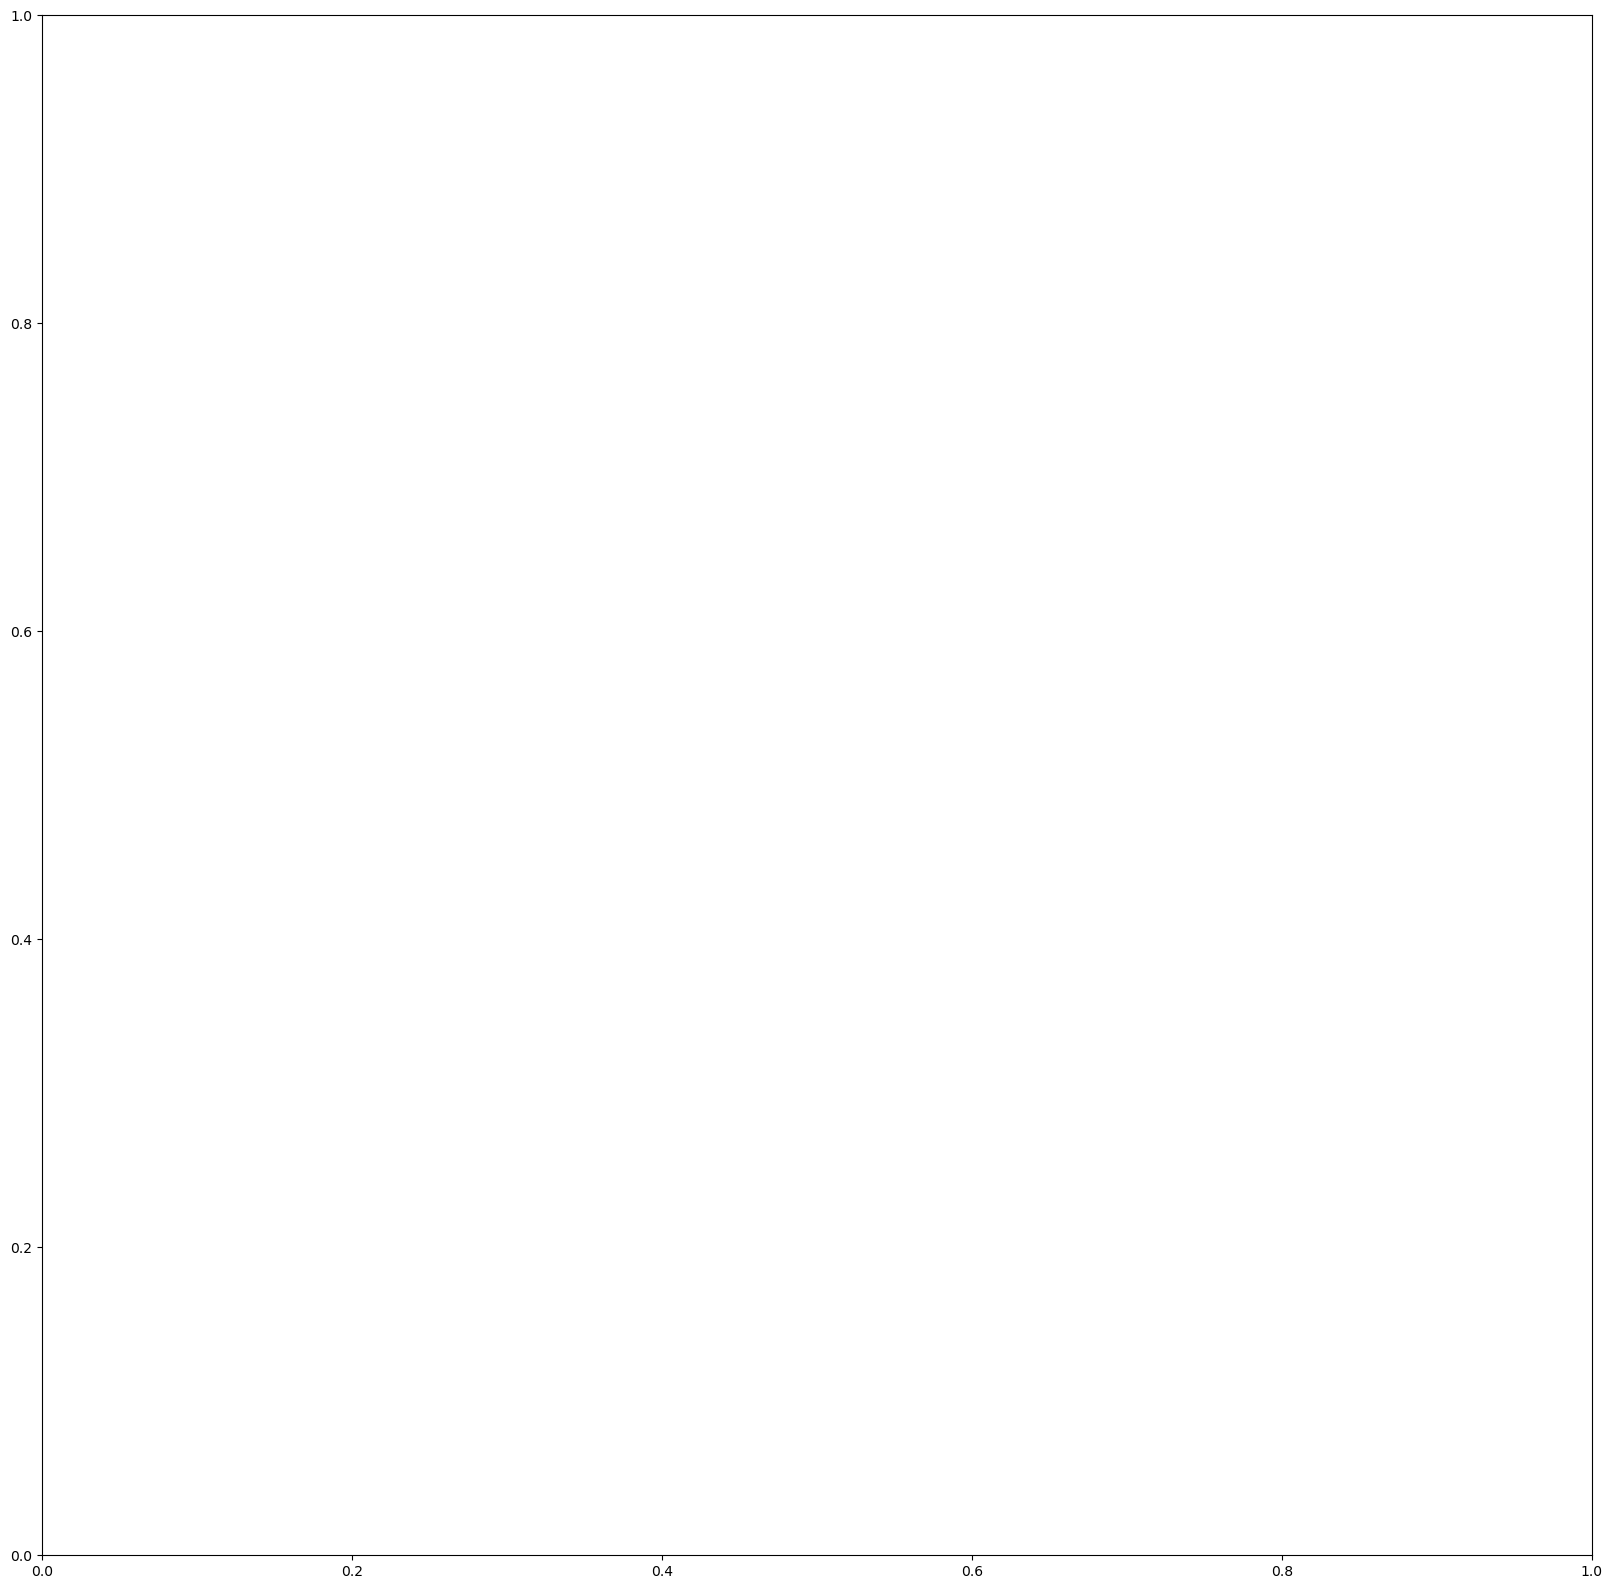

In [165]:
import matplotlib.pyplot as plt
x_values = np.linspace(-0.5, 0.5, 100)
y_values = np.linspace(-0.5, 0.5, 100)

# Create a grid of (x, y) values using meshgrid
X, Y = np.meshgrid(x_values, y_values)

# Calculate the function values for each point in the grid
Z = func_E1byE0(X,Y)

# Plot the contour
plt.figure(figsize=(20, 20))
contour = plt.contourf(X, Y, Z, levels=10,cmap='hot_r')  # Adjust levels as needed
colorbar = plt.colorbar(contour, label='Function Value')

plt.xlabel('Poisson\'s Ratio of Material A')
plt.ylabel('Poisson\'s Ratio of Material B')
plt.title('Contour Plot Non-Dimensional Out of Plane Young\'s Modulus of a Laminate with two laminas of equal Young\'s Modulus and Volume Fraction')
plt.grid(True)
plt.gca().set_aspect('equal')
plt.show()

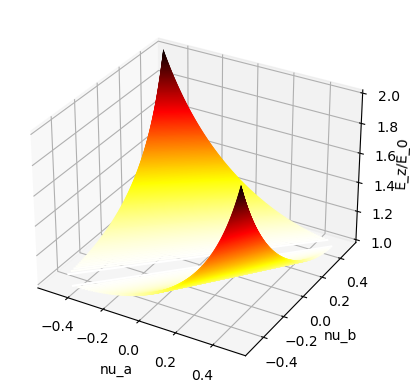

In [147]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 500, cmap='hot_r')
ax.set_xlabel('nu_a')
ax.set_ylabel('nu_b')
ax.zaxis.labelpad=-1.9
ax.set_zlabel('E_z/E_0');

# Case:2: Plotting $E_C/E_A$ for various volume fractions and ratio of Young's Modulus of Laminas keeping $\pm\nu_A=\mp\nu_B=\sqrt{0.1}$

In [152]:
eq25=eq24.subs(nua,sym.sqrt(0.1)).subs(nub,-sym.sqrt(0.1))
display(eq25)

Eq(E_z, E_a*E_b*(-1.31622776601684*E_a*V_A - 0.683772233983162*E_b*V_B)/(E_a*V_B*(-1.31622776601684*E_a*V_A - 0.683772233983162*E_b*V_B - 0.632455532033676*V_A*(-0.316227766016838*E_a - 0.316227766016838*E_b)) - E_b*V_A*(1.31622776601684*E_a*V_A + 0.683772233983162*E_b*V_B + 0.632455532033676*V_B*(-0.316227766016838*E_a - 0.316227766016838*E_b))))